# Images dataset Preparing for training.
## (Images Dataset Transform and Loader) bold text

In [16]:
import torchvision
import torch
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np

## Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check location of dataset

In [ ]:
os.listdir('./drive/MyDrive/path')

In [6]:
training_dataset_path = "./drive/MyDrive/path/of/trainingDataset"

In [9]:
testing_dataset_path = './drive/MyDrive/path/of/testDataset'

## Transforms

In [22]:
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p = 0.25),
    transforms.RandomRotation(10), #10 degree rotation
    transforms.ToTensor(),# necessary for pytorch
    #transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

In [23]:
test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

## Creat Train and Test dataset with applied transforms

In [27]:
Train_Ds =torchvision.datasets.ImageFolder(root = training_dataset_path, transform = train_transforms)
Test_Ds =torchvision.datasets.ImageFolder(root = testing_dataset_path, transform = test_transforms)

In [ ]:
print(type(Train_Ds))

## Creat Loader

In [28]:
train_loader = torch.utils.data.DataLoader(dataset = Train_Ds, batch_size = 32, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = Test_Ds, batch_size = 32, shuffle = False)


## Show Transformed Images

In [41]:
def show(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size= 16, shuffle = True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images,nrow = 4)
  img = torchvision.transforms.ToPILImage()(grid)
  plt.imshow(img)

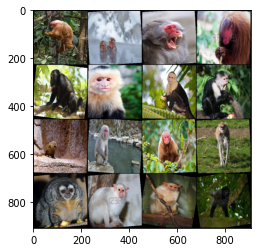

In [42]:
show(Train_Ds)